In [1]:
# Checking GPU connection
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
!unzip 'drive/My Drive/garbage/check'

Archive:  drive/My Drive/garbage/check.zip
   creating: check/cardboard_224x224/
  inflating: check/cardboard_224x224/1.jpg  
  inflating: check/cardboard_224x224/10.jpg  
  inflating: check/cardboard_224x224/100.jpg  
  inflating: check/cardboard_224x224/101.jpg  
  inflating: check/cardboard_224x224/102.jpg  
  inflating: check/cardboard_224x224/103.jpg  
  inflating: check/cardboard_224x224/104.jpg  
  inflating: check/cardboard_224x224/105.jpg  
  inflating: check/cardboard_224x224/106.jpg  
  inflating: check/cardboard_224x224/107.jpg  
  inflating: check/cardboard_224x224/108.jpg  
  inflating: check/cardboard_224x224/109.jpg  
  inflating: check/cardboard_224x224/11.jpg  
  inflating: check/cardboard_224x224/110.jpg  
  inflating: check/cardboard_224x224/111.jpg  
  inflating: check/cardboard_224x224/112.jpg  
  inflating: check/cardboard_224x224/113.jpg  
  inflating: check/cardboard_224x224/114.jpg  
  inflating: check/cardboard_224x224/115.jpg  
  inflating: check/cardboard_2

In [4]:
!pip install python-resize-image

    100% |████████████████████████████████| 61kB 4.6MB/s 
    100% |████████████████████████████████| 2.0MB 16.4MB/s 
spacy 2.0.18 has requirement numpy>=1.15.0, but you'll have numpy 1.14.6 which is incompatible.
imgaug 0.2.8 has requirement numpy>=1.15.0, but you'll have numpy 1.14.6 which is incompatible.
google-colab 1.0.0 has requirement requests~=2.18.0, but you'll have requests 2.21.0 which is incompatible.
fastai 1.0.50.post1 has requirement numpy>=1.15, but you'll have numpy 1.14.6 which is incompatible.
datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.8 which is incompatible.
  Found existing installation: requests 2.18.4
    Uninstalling requests-2.18.4:
      Successfully uninstalled requests-2.18.4
  Found existing installation: Pillow 4.1.1
    Uninstalling Pillow-4.1.1:
      Successfully uninstalled Pillow-4.1.1


In [5]:
# To work with numpy arrays.
import numpy as np 

# To create the convolution neural network
import keras 

# To provide with the name of the images.
import glob

# To read rgb values of images.
import cv2

# To resize images.
from resizeimage import resizeimage

# To open the image so it can be resized.
from PIL import Image

# To plot images and graphs
import matplotlib.pyplot as plt
%matplotlib inline

# To create the training, testing and validation datasets from a single dataset.
from sklearn.model_selection import train_test_split

# To create the neural network 
from keras.models import Sequential

# To add hidden layers as per requirements
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# To call the 
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [0]:
# # resize images to 224x224
# x=[]
# y=[]

# # Converting the cardboard images to 224x224 pixels.

# cardboard_images=glob.glob('./Dataset/cardboard/*.jpg')

# i=1 
# for image in cardboard_images :
#     open_image=Image.open(image)
#     new_image=open_image.resize((224,224))
#     new_image.save('./Dataset_224x224/cardboard_224x224/'+str(i)+'.jpg')
#     i=i+1
   
# # Converting the glass images to 224x224 pixels.

# glass_images=glob.glob('./Dataset/glass/*.jpg')

# i=1 
# for image in glass_images :
#     open_image=Image.open(image)
#     new_image=open_image.resize((224,224))
#     new_image.save('./Dataset_224x224/glass_224x224/'+str(i)+'.jpg')
#     i=i+1

# # Converting the metal images to 224x224 pixels.

# metal_images=glob.glob('./Dataset/metal/*.jpg')

# i=1 
# for image in metal_images :
#     open_image=Image.open(image)
#     new_image=open_image.resize((224,224))
#     new_image.save('./Dataset_224x224/metal_224x224/'+str(i)+'.jpg')
#     i=i+1
    
# # Converting the paper images to 224x224 pixels.

# paper_images=glob.glob('./Dataset/paper/*.jpg')

# i=1 
# for image in paper_images :
#     open_image=Image.open(image)
#     new_image=open_image.resize((224,224))
#     new_image.save('./Dataset_224x224/paper_224x224/'+str(i)+'.jpg')
#     i=i+1

# # Converting the plastic images to 224x224 pixels.

# plastic_images=glob.glob('./Dataset/plastic/*.jpg')

# i=1 
# for image in plastic_images :
#     open_image=Image.open(image)
#     new_image=open_image.resize((224,224))
#     new_image.save('./Dataset_224x224/plastic_224x224/'+str(i)+'.jpg')
#     i=i+1

# # Converting the test images to 224x224 pixels.

# trash_images=glob.glob('./Dataset/test/*.jpg')

# i=1 
# for image in trash_images :
#     open_image=Image.open(image)
#     new_image=open_image.resize((224,224))
#     new_image.save('./Dataset_224x224/test_224x224/'+str(i)+'.jpg')
#     i=i+1

In [0]:
# storing images and labels in lists

#images
x=[]
#labels
y=[]

# cardboard

#len(glob.glob('*')) reads no. of files in a folder 
for i in range(len(glob.glob('/content/check/cardboard_224x224/*jpg'))):
    img=cv2.imread('/content/check/cardboard_224x224/'+str(i+1)+'.jpg')
    x.append(img)
    y.append(0)
    
# glass

for i in range(len(glob.glob('/content/check/glass_224x224/*jpg'))) :
    img=cv2.imread('/content/check/glass_224x224/'+str(i+1)+'.jpg')
    x.append(img)
    y.append(1)
    
# metal    
    
for i in range(len(glob.glob('/content/check/metal_224x224/*jpg'))) :
    img=cv2.imread('/content/check/metal_224x224/'+str(i+1)+'.jpg')
    x.append(img)
    y.append(2)
    
# paper    
    
for i in range(len(glob.glob('/content/check/paper_224x224/*jpg'))) :
    img=cv2.imread('/content/check/paper_224x224/'+str(i+1)+'.jpg')
    x.append(img)
    y.append(3)
    
# plastic    
    
for i in range(len(glob.glob('/content/check/plastic_224x224/*jpg'))) :
    img=cv2.imread('/content/check/plastic_224x224/'+str(i+1)+'.jpg')
    x.append(img)
    y.append(4)
    
# test

for i in range(len(glob.glob('/content/check/test_224x224/*jpg'))) :
    img=cv2.imread('/content/check/test_224x224/'+str(i+1)+'.jpg')
    x.append(img)
    y.append(5)    

In [0]:
# shape of 1st image
x[0].shape

(224, 224, 3)

In [0]:
# one-hot encode labels
y=keras.utils.to_categorical(y)

In [0]:
# shape of labels list
y.shape

(2524, 6)

In [0]:
# convert image list to numpy array
x_new=np.stack(x,axis=0)
#x_new=x_new.astype('float')
x_new=x_new/255

In [0]:
# splitting dataset into training and testing data
from sklearn.model_selection import train_test_split
# training, testing data
x_train,x_test,y_train,y_test= train_test_split(x_new,y,test_size=0.3,random_state=42)

# ANN

In [0]:
# Defining the neural network

nn=Sequential()

nn.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu',input_shape=(224, 224, 3)))
nn.add(MaxPooling2D(pool_size=2))
nn.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
nn.add(MaxPooling2D(pool_size=2))
nn.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
nn.add(MaxPooling2D(pool_size=2))
#
nn.add(Dropout(0.3))
nn.add(Flatten())
nn.add(Dense(500, activation='relu'))
nn.add(Dropout(0.5))
nn.add(Dense(6, activation='softmax'))

#nn.summary()

In [0]:
nn.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [0]:
nn.fit(x_train,y_train,epochs=3,validation_split=0.3,batch_size=100,verbose=1)

Train on 794 samples, validate on 341 samples
Epoch 1/3
794/794 [==============================] - 12s 15ms/step - loss: 7.2460 - acc: 0.2960 - val_loss: 7.2989 - val_acc: 0.3490
Epoch 2/3
794/794 [==============================] - 3s 3ms/step - loss: 7.3383 - acc: 0.3123 - val_loss: 2.9834 - val_acc: 0.4604
Epoch 3/3
794/794 [==============================] - 3s 3ms/step - loss: 1.7250 - acc: 0.3690 - val_loss: 1.4048 - val_acc: 0.3255


# Using pre-trained VGG16 model

In [0]:
from keras.applications import VGG16
from keras.callbacks import ModelCheckpoint 

In [11]:
#load model
vgg=VGG16(include_top=False,input_shape=(224,224,3))

Instructions for updating:
Colocations handled automatically by placer.
58892288/58889256 [==============================] - 6s 0us/step


In [0]:
vgg.summary()
#last layer shows that this model was trained on 1000 images of ImageNet

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [0]:
#we donot want to train the pre-trained layers
for layer in vgg.layers:
    layer.trainable = False

In [0]:
# to check trainable
# for layer in vgg.layers:
#     print(layer, layer.trainable)

In [0]:
#create a sequential model with all the layers from resnet model
model=Sequential()
#for layer in resnet.layers:
for layer in vgg.layers:
    model.add(layer)

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       295168    
__________

In [14]:
#adding final dense layer predicting 9 classes of numbers
model.add(Flatten())
model.add(Dropout(0.6))
model.add(Dense(6,activation='softmax'))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       295168    
__________

In [0]:
# 4-dim:sample size, rows, columns, channels
x_train_reshape=x_train.reshape(x_train.shape[0],224,224,3)
x_test_reshape=x_test.reshape(x_test.shape[0],224,224,3)

In [0]:
#compile the model; needs tuning
from keras import optimizers
Adam=optimizers.adam(lr=0.000000001)
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [0]:
# saving best weights
checkpointVGG = ModelCheckpoint(filepath='vgg.best.weights.hdf5', verbose=1, save_best_only=True)
# fit; needs tuning
history=model.fit(x_train_reshape,y_train,epochs=10,validation_split=0.3,batch_size=100,verbose=1,callbacks=[checkpointVGG])

Train on 1236 samples, validate on 530 samples
Epoch 1/10
1236/1236 [==============================] - 18s 14ms/step - loss: 0.1408 - acc: 0.9531 - val_loss: 0.7898 - val_acc: 0.7434

Epoch 00001: val_loss improved from inf to 0.78983, saving model to vgg.best.weights.hdf5
Epoch 2/10
1236/1236 [==============================] - 17s 14ms/step - loss: 0.0704 - acc: 0.9846 - val_loss: 0.7670 - val_acc: 0.7774

Epoch 00002: val_loss improved from 0.78983 to 0.76703, saving model to vgg.best.weights.hdf5
Epoch 3/10
1236/1236 [==============================] - 17s 14ms/step - loss: 0.0617 - acc: 0.9895 - val_loss: 0.7956 - val_acc: 0.7660

Epoch 00003: val_loss did not improve from 0.76703
Epoch 4/10
1236/1236 [==============================] - 17s 14ms/step - loss: 0.0579 - acc: 0.9871 - val_loss: 0.8223 - val_acc: 0.7415

Epoch 00004: val_loss did not improve from 0.76703
Epoch 5/10
1236/1236 [==============================] - 17s 14ms/step - loss: 0.0611 - acc: 0.9895 - val_loss: 0.8298 -

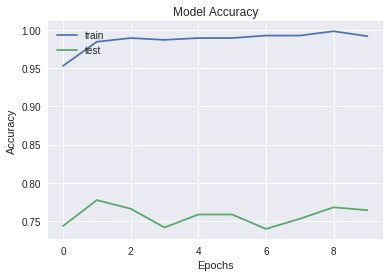

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [0]:
# save the checkpoint to folder
model.save('drive/My Drive/garbage/Checkpoints/vgg.best.weights.hdf5')

In [20]:
# RUN TO CHECK ACCURACY OF MODEL

#load best saved weights
print('Evaluating on current trained model:')
model.load_weights('drive/My Drive/garbage/Checkpoints/vgg.best.weights.hdf5')
#evaluate on test data
model.evaluate(x_test_reshape,y_test,verbose=1)

Evaluating on current trained model:
758/758 [==============================] - 7s 9ms/step


[0.889488049264319, 0.7519788911915077]

Actual category label: 1
Actual category name: Glass
Predicted category label: 1
Predicted category name: Glass
It is non-bio-degradable.


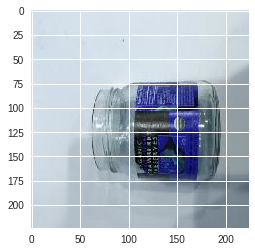

In [23]:
# predicting on randomly selected picture
import random
index=random.randrange(0,487)
plt.imshow(x_test[index])
pred = model.predict(x_test[index].reshape(1,224,224,3))
p=pred.argmax()
# print('Predicted class:',p)
item=['Cardboard','Glass','Metal','Paper','Plastic','Miscellaneous']
print('Actual category label:',p)
print('Actual category name:',item[p])
# pred
print('Predicted category label:',p)
print('Predicted category name:',item[p])

if p==0 or p==3:
  print('It is bio-degradable.')
else:
  print('It is non-bio-degradable.')

# Using pre-trained ResNet model

In [0]:
from keras.applications.resnet50 import ResNet50

In [25]:
res=ResNet50(include_top=False,input_shape=(224,224,3))

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 7s 0us/step


In [0]:
res.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [0]:
from keras.models import Model
from keras.callbacks import ModelCheckpoint 

In [0]:
# train till layer 168
count=169
for layer in res.layers:
  if count!=0:
    layer.trainable=False
    count-=1
  else:    
    layer.trainable=True

In [0]:
for layer in res.layers:
  print(layer.trainable)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

In [0]:
#adding layers to ResNet50 model
x=res.output
#x=Activation(filters=)
#x=Conv2D()
#x=BatchNormalization(axis=3)(x)
x=Flatten()(x)
x=Dropout(0.3)(x)
x=Dense(6,activation='softmax')(x)
#create a new model with ResNet50 weights
model_res=Model(inputs=res.input,outputs=x)

In [0]:
model_res.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [0]:
# 4-dim:samples, rows, columns, channels
x_train_reshape=x_train.reshape(x_train.shape[0],224,224,3)
x_test_reshape=x_test.reshape(x_test.shape[0],224,224,3)

In [0]:
# saving best weights
checkpointRes = ModelCheckpoint(filepath='resnet.best.weights.hdf5', verbose=1, save_best_only=True)
model_res.fit(x_train_reshape,y_train,epochs=10,validation_split=0.3,batch_size=50,verbose=1,callbacks=[checkpointRes])

Train on 794 samples, validate on 341 samples
Epoch 1/10
794/794 [==============================] - 12s 15ms/step - loss: 1.4616 - acc: 0.9093 - val_loss: 5.9782 - val_acc: 0.3666

Epoch 00001: val_loss improved from inf to 5.97816, saving model to resnet.best.weights.hdf5
Epoch 2/10
794/794 [==============================] - 9s 12ms/step - loss: 1.4422 - acc: 0.9106 - val_loss: 6.0800 - val_acc: 0.3783

Epoch 00002: val_loss did not improve from 5.97816
Epoch 3/10
794/794 [==============================] - 9s 12ms/step - loss: 1.4414 - acc: 0.9106 - val_loss: 6.6942 - val_acc: 0.2287

Epoch 00003: val_loss did not improve from 5.97816
Epoch 4/10
794/794 [==============================] - 9s 12ms/step - loss: 1.4417 - acc: 0.9106 - val_loss: 6.8194 - val_acc: 0.2258

Epoch 00004: val_loss did not improve from 5.97816
Epoch 5/10
794/794 [==============================] - 9s 12ms/step - loss: 1.4440 - acc: 0.9093 - val_loss: 5.4233 - val_acc: 0.3460

Epoch 00005: val_loss improved from 5

In [0]:
# save the checkpoint to folder
model_res.save('drive/My Drive/garbage/Checkpoints/resnet.best.weights.hdf5')

## Why are we getting bad result on using ResNet??
- we get no guarantees that the mean and variance of our new dataset inside the BN layers will be similar to the ones of the original dataset. As a result, if we fine-tune the top layers, their weights will be adjusted to the mean/variance of the new dataset. Nevertheless, during inference the top layers will receive data which are scaled using the mean/variance of the original dataset.

In [33]:
#load best saved weights
model_res.load_weights('drive/My Drive/garbage/Checkpoints/resnet.best.weights.hdf5')
#evaluate on test data
model_res.evaluate(x_test_reshape,y_test,verbose=1)

758/758 [==============================] - 9s 12ms/step


[9.323980323872025, 0.19393139857415473]

# SVM

In [0]:
from sklearn import svm

In [0]:
x_train.shape

(1135, 224, 224, 3)

In [0]:
x_new.shape

(1622, 224, 224, 3)

In [0]:
#flatten images to 1D
x_train_flatten=x_train.reshape(x_train.shape[0],-1)
x_test_flatten=x_test.reshape(x_test.shape[0],-1)
#converting one-hot encoding back to numbers using argmax()
y_train_flatten=np.argmax(y_train,axis=-1)
y_test_flatten=np.argmax(y_test,axis=-1)

In [0]:
#without training svm 
clf=svm.SVC()
clf.fit(x_train_flatten,y_train_flatten)
clf.score(x_test_flatten,y_test_flatten)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.5749486652977412

3


array([3])

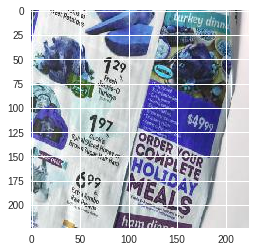

In [0]:
# predicting on randomly selected picture
import random
index=random.randrange(0,487)
plt.imshow(x_test[index])
pred = clf.predict(x_test_flatten[index].reshape(1,-1))
#print(pred.argmax())
print(y_test_flatten[index])
pred

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
#trained svm
param={'C':[10,100],
      'kernel':['poly','sigmoid']
      }
svc=svm.SVC()
clf_grid=GridSearchCV(estimator=svc,param_grid=param,cv=3,verbose=1)
clf_grid.fit(x_train_flatten,y_train_flatten)
#using best estimator
best_clf=clf_grid.best_estimator_
best_clf.score(x_test_flatten,y_test_flatten)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local

0.7125256673511293

In [0]:
#using best estimator
best_clf=clf_grid.best_estimator_
best_clf.score(x_test_flatten,y_test_flatten)

4


array([4])

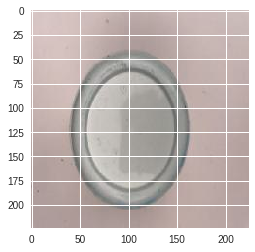

In [0]:
# predicting on randomly selected picture
import random
index=random.randrange(0,487)
plt.imshow(x_test[index])
pred = best_clf.predict(x_test_flatten[index].reshape(1,-1))
#print(pred.argmax())
print(y_test_flatten[index])#actual
pred#predicted

In [0]:
clf_grid.best_params_

{'C': 100, 'kernel': 'poly'}

In [0]:
svc=svm.SVC(C=100,kernel='poly')
svc.fit(x_train_flatten,y_train_flatten)
svc.score(x_test_flatten,y_test_flatten)

Actual category label: 5
Predicted category label: [5]
Predicted category name: Miscellaneous
It is non bio-degradable.


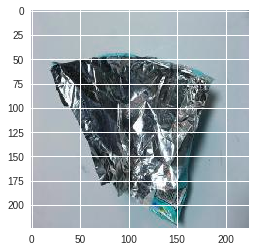

In [0]:
# predicting on randomly selected picture
import random
index=random.randrange(0,487)
plt.imshow(x_test[index])
pred = best_clf.predict(x_test_flatten[index].reshape(1,-1))
#print(pred.argmax())
print('Actual category label:',y_test_flatten[index])#actual
p=pred#predicted
item=['Cardboard','Glass','Metal','Paper','Plastic','Miscellaneous']
print('Predicted category label:',p)
print('Predicted category name:',item[p[0]])

if p==0 or p==3:
  print('It is bio-degradable.')
else:
  print('It is non bio-degradable.')